In [31]:
import pandas as pd
from os.path import abspath, exists
from scipy import sparse
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy
import collections
import time 
import sys
import math
import scipy.sparse.linalg as ll
from sklearn.decomposition import PCA
import sklearn.preprocessing as skpp

In [259]:
def perform_PCA(x, k):
    x=x.transpose()
    m,n = x.shape
    mu = np.mean(x,axis = 1)
    xc = x - mu[:,None]
    
    #covariance matrix
    C = np.dot(xc,xc.T)/m

    S,W = ll.eigs(C,k = K)
    S = S.real
    W = W.real

    Z= np.zeros((x.shape[1],k))


    for i in range(k):  
        # sqrt of lambda is removed from the formula to have consistent results with PCA package
        z = np.dot(W[:,i].T,xc)
        Z[:,i]=z
    return W,Z

In [240]:
food_df = pd.read_csv('food-consumption.csv')
food_df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


In [258]:
food_df.columns[20]

'Crisp bread'

In [218]:
features = food_df.drop('Country', 1)
#convert dataframe to numpy array
features_vc = features.values

In [219]:
#perform PCA package from sklearn
pca = PCA(n_components=2)
pca.fit(features_vc.transpose())
x_new = pca.fit_transform(features_vc)
pc = pca.components_

x_new

array([[-21.58507715, -10.96088553],
       [ 79.40476342,   9.07838898],
       [ 34.37161296, -38.80913049],
       [-60.28980824, -23.51721506],
       [ 10.67230333, -13.37609648],
       [ 18.27674707, -60.86917098],
       [-87.8936147 , -61.183344  ],
       [ 92.69942606,  21.46054109],
       [ 38.12976114,  31.89857827],
       [ 11.70469954, -35.84349963],
       [-54.22680693,  58.53346257],
       [-47.70556172,  34.5620369 ],
       [-26.51686507,  55.19618469],
       [-19.71348904,  66.10554177],
       [ 72.24003402, -14.64361356],
       [-39.5681247 , -17.63177854]])

In [229]:
pc

array([[ 0.03468684, -0.12855665, -0.26380563, -0.12831501, -0.19272266,
        -0.08259391, -0.28736279, -0.06178206, -0.09932528, -0.14744931,
        -0.12598819, -0.0453415 , -0.29809045, -0.33596702,  0.56607817,
        -0.10377258, -0.16360858,  0.33173837, -0.00285563, -0.21574694],
       [ 0.1964172 , -0.49470786, -0.00498578, -0.0025282 , -0.17557523,
        -0.25949092, -0.15755102,  0.02742506,  0.14178443,  0.06602619,
        -0.25239852, -0.14881338, -0.33973568, -0.09349624, -0.29672554,
        -0.10793775,  0.00480177, -0.24008316, -0.23945811,  0.37913341]])

In [227]:
#perform PCA from the function I wrote
k = 2
W,Z = perform_PCA(features_vc, k)
Z

array([[ 21.58507715, -10.96088553],
       [-79.40476342,   9.07838898],
       [-34.37161296, -38.80913049],
       [ 60.28980824, -23.51721506],
       [-10.67230333, -13.37609648],
       [-18.27674707, -60.86917098],
       [ 87.8936147 , -61.183344  ],
       [-92.69942606,  21.46054109],
       [-38.12976114,  31.89857827],
       [-11.70469954, -35.84349963],
       [ 54.22680693,  58.53346257],
       [ 47.70556172,  34.5620369 ],
       [ 26.51686507,  55.19618469],
       [ 19.71348904,  66.10554177],
       [-72.24003402, -14.64361356],
       [ 39.5681247 , -17.63177854]])

In [230]:
W

array([[-0.03468684,  0.1964172 ],
       [ 0.12855665, -0.49470786],
       [ 0.26380563, -0.00498578],
       [ 0.12831501, -0.0025282 ],
       [ 0.19272266, -0.17557523],
       [ 0.08259391, -0.25949092],
       [ 0.28736279, -0.15755102],
       [ 0.06178206,  0.02742506],
       [ 0.09932528,  0.14178443],
       [ 0.14744931,  0.06602619],
       [ 0.12598819, -0.25239852],
       [ 0.0453415 , -0.14881338],
       [ 0.29809045, -0.33973568],
       [ 0.33596702, -0.09349624],
       [-0.56607817, -0.29672554],
       [ 0.10377258, -0.10793775],
       [ 0.16360858,  0.00480177],
       [-0.33173837, -0.24008316],
       [ 0.00285563, -0.23945811],
       [ 0.21574694,  0.37913341]])

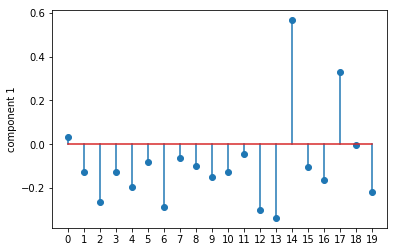

In [223]:
k = 2
Z = perform_PCA(features_vc, k)
x= range(20)
plt.stem(x,W[:,0])
plt.ylabel('component 1')
plt.xticks(np.arange(0, 20, step=1))
plt.show()

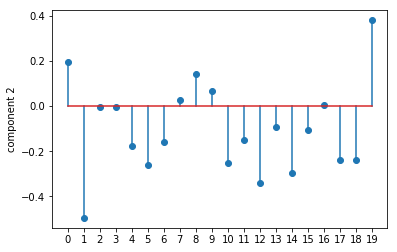

In [168]:
x= range(20)
plt.stem(x,W[:,1])
plt.ylabel('component 2')
plt.xticks(np.arange(0, 20, step=1))
plt.show()

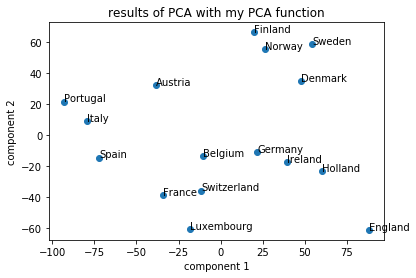

In [228]:
plt.scatter(Z[:,0], Z[:,1])
for i, txt in enumerate(food_df['Country']):
    plt.annotate(txt, (Z[i][0], Z[i][1]))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('results of PCA with my PCA function')
plt.show()

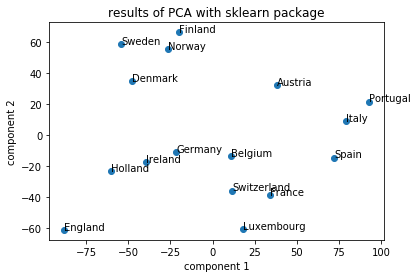

In [225]:
plt.scatter(x_new[:,0], x_new[:,1])
for i, txt in enumerate(food_df['Country']):
    plt.annotate(txt, (x_new[i][0], x_new[i][1]))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('results of PCA with sklearn package')
plt.show()

In [231]:
# transpose the dataframe to get the country dataframe
country_df = food_df.T
header = country_df.iloc[0]
country_df = country_df.iloc[1:]


country_df.columns = header
country_df = country_df.astype('int32')
country_vec = country_df.values

food_index = country_df.index.tolist()

In [245]:
country_df

Country,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland
Real coffee,90,82,88,96,94,97,27,72,55,73,97,96,92,98,70,30
Instant coffee,49,10,42,62,38,61,86,26,31,72,13,17,17,12,40,52
Tea,88,60,63,98,48,86,99,77,61,85,93,92,83,84,40,99
Sweetener,19,2,4,32,11,28,22,2,15,25,31,35,13,20,18,11
Biscuits,57,55,76,62,74,79,91,22,29,31,61,66,62,64,62,80
Powder soup,51,41,53,67,37,73,55,34,33,69,43,32,51,27,43,75
Tin soup,19,3,11,43,23,12,76,1,1,10,43,17,4,10,2,18
Potatoes,21,2,23,7,9,7,17,5,5,17,39,11,17,8,14,2
Frozen fish,27,4,11,14,13,26,20,20,15,19,54,51,30,18,23,5
Frozen veggies,21,2,5,14,12,23,24,3,11,15,45,42,15,12,7,3


In [260]:
k=2
Z,new_X = perform_PCA(country_vec, k)
new_X

array([[-132.72128424,   17.57778346],
       [  26.42956485,    2.25103491],
       [-127.91647983,  -45.09259969],
       [ 112.2936914 ,   -8.56385242],
       [ -61.97314614,  -22.39070714],
       [ -13.15487325,    2.83044268],
       [ 112.73977848,  -37.2146786 ],
       [ 134.27094956,    4.3854968 ],
       [  98.36936215,   -5.82797629],
       [ 121.42208557,  -12.90611376],
       [ -85.91147175,   -3.80159386],
       [ -98.84641105,   10.64892026],
       [  15.49167283,  -30.96247154],
       [ -32.73151786,  -58.42241897],
       [  11.89819034,  139.49588685],
       [-123.50875201,   -8.57884668],
       [ -97.17870408,  -20.86783326],
       [ -34.87542253,   89.7045853 ],
       [  98.04926206,   24.4264628 ],
       [  77.8535055 ,  -36.69152084]])

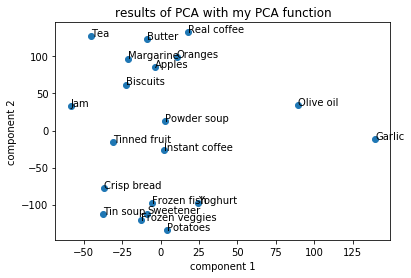

In [252]:
plt.scatter(new_X[:,1], new_X[:,0])
for i, txt in enumerate(food_index):
    plt.annotate(txt, (new_X[i][1], new_X[i][0]))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('results of PCA with my PCA function')
plt.show()

In [249]:
pca = PCA(n_components=2)
pca.fit(country_vec)
pc_f = pca.fit_transform(country_vec)

pc_f

array([[-132.72128424,   17.57778346],
       [  26.42956485,    2.25103491],
       [-127.91647983,  -45.09259969],
       [ 112.2936914 ,   -8.56385242],
       [ -61.97314614,  -22.39070714],
       [ -13.15487325,    2.83044268],
       [ 112.73977848,  -37.2146786 ],
       [ 134.27094956,    4.3854968 ],
       [  98.36936215,   -5.82797629],
       [ 121.42208557,  -12.90611376],
       [ -85.91147175,   -3.80159386],
       [ -98.84641105,   10.64892026],
       [  15.49167283,  -30.96247154],
       [ -32.73151786,  -58.42241897],
       [  11.89819034,  139.49588685],
       [-123.50875201,   -8.57884668],
       [ -97.17870408,  -20.86783326],
       [ -34.87542253,   89.7045853 ],
       [  98.04926206,   24.4264628 ],
       [  77.8535055 ,  -36.69152084]])

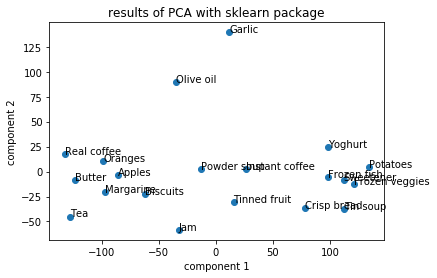

In [251]:
plt.scatter(pc_f[:,0], pc_f[:,1])
for i, txt in enumerate(food_index):
    plt.annotate(txt, (pc_f[i][0], pc_f[i][1]))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('results of PCA with sklearn package')
plt.show()